In [1]:
123

123

In [2]:
import data_handler
import model as M
import dilated_model as DM
import trainer as T

import numpy as np
import torch as th
from torch.autograd import Variable
import pickle
import random
random.seed(42)

In [3]:
from IPython import display
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
# import seaborn as sns
import time

%matplotlib inline
th.multiprocessing.set_sharing_strategy('file_system')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [13]:
dataset = data_handler.DataSet(
    'data/raw/training2017/REFERENCE.csv', data_handler.load_crop_thresholded,
    random_invert=True,
    crop_len=2100,
    sigma=2.2,
    path='data/raw/training2017/',
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.8)
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=1, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

In [7]:
resnet9_32 = DM.ResNet(9, 32)

generating block: 1
generating block: 2
generating block: 3
generating block: 4
generating block: 5
generating block: 6
generating block: 7
generating block: 8


In [8]:
def plot_logit(dilNet):
    dil_res = dilNet.forward_conv(t_data, )
    plt.imshow(dil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
    plt.show()

    plt.subplot(3,1,1)
    plt.plot(dil_res.data.numpy().squeeze()[0])

    plt.subplot(3,1,2)
    plt.plot(dil_res.data.numpy().squeeze()[1])

    plt.subplot(3,1,3)
    plt.plot(dil_res.data.numpy().squeeze()[2])

# PROOF OF CONCEPT

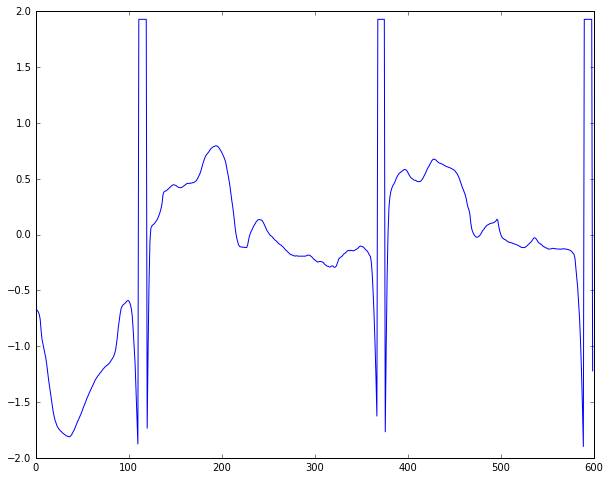

In [9]:
it = iter(train_producer)
data = it.next()
in_channels = data['x'].size()[1]
t_data = data['x']
plt.plot(t_data.data.numpy().squeeze())

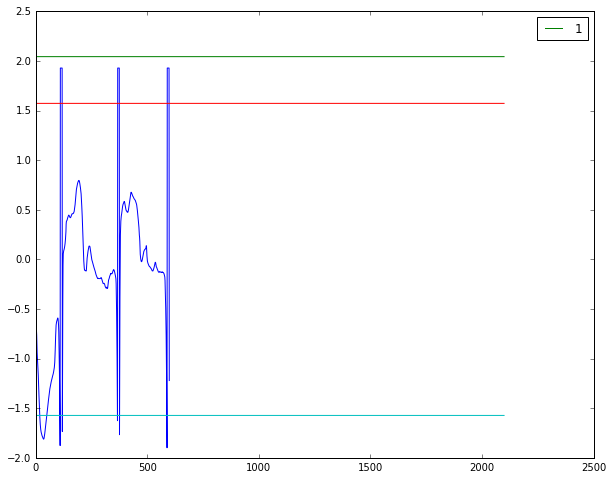

In [10]:
_data = t_data.data.clone().numpy().squeeze()
sigma = 3
_data[np.abs(_data) > _data.std()*sigma] = _data.std()*sigma

plt.plot(_data.squeeze())
plt.plot(np.ones(2100)*(_data**2).std()**.5*2, label='1')
plt.plot(np.ones(2100)*_data.std()*2)
plt.plot(np.ones(2100)*_data.std()*-2)
plt.legend()
#plt.plot()

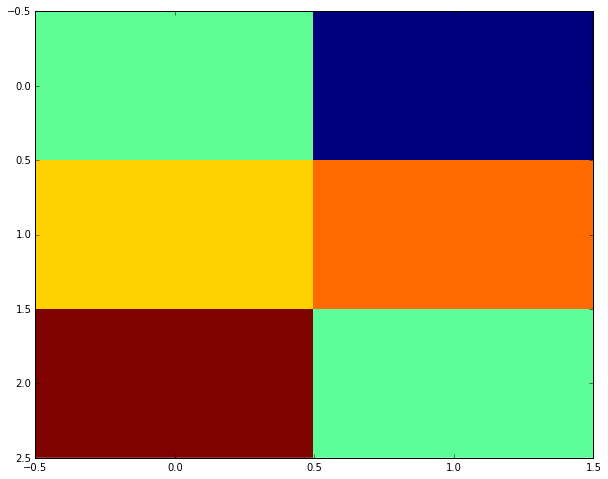

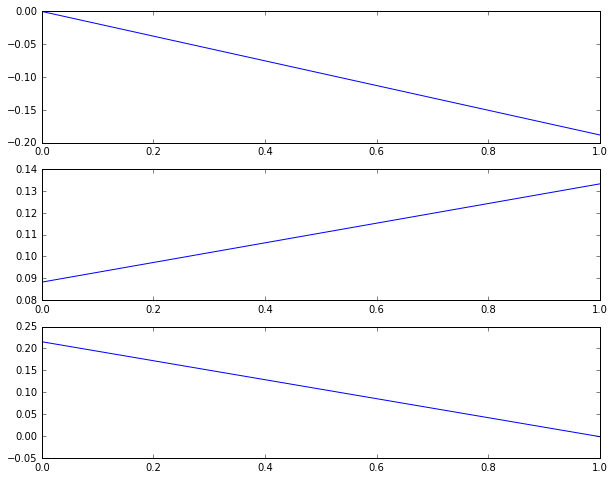

In [14]:
plot_logit(resnet9_32)

In [15]:
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=32, shuffle=True,
        num_workers=4, collate_fn=data_handler.batchify)
test_producer = th.utils.data.DataLoader(
        dataset=eval_set, batch_size=16, shuffle=True,
        num_workers=4, collate_fn=data_handler.batchify)
trainer = T.trainer('ckpt/low_cap_alt_dil')
trainer(resnet8_32, train_producer, test_producer, epochs=1000, gpu_id=0)

[1,  20] sample/sec 19.79
[1,  40] sample/sec 19.71
[1,  60] sample/sec 19.78
[1,  80] sample/sec 19.72
[1, 100] sample/sec 19.73
[1, 120] sample/sec 19.64
[1, 140] sample/sec 19.78
[1, 160] sample/sec 19.72
[1, 180] sample/sec 19.68
[1, 200] sample/sec 19.68
Train acc: 
 0.3419  0.4880  0.2684
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 77.20
 0.4754  0.5934  0.1234
[torch.FloatTensor of size 1x3]

epoch time:       6.06 min
     total:       6.06 min
 est. left:    6049.85 min
----------------------------------------
[2,  20] sample/sec 19.77
[2,  40] sample/sec 19.79
[2,  60] sample/sec 19.77
[2,  80] sample/sec 19.84
[2, 100] sample/sec 19.90
[2, 120] sample/sec 19.85
[2, 140] sample/sec 19.85
[2, 160] sample/sec 19.84
[2, 180] sample/sec 19.90
[2, 200] sample/sec 19.88
Train acc: 
 0.6465  0.6442  0.2602
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 80.70
 0.6562  0.6663  0.3652
[torch.FloatTensor of size 1x3]

epoch time:       6.04 min
     total:

[16,  40] sample/sec 20.28
[16,  60] sample/sec 20.22
[16,  80] sample/sec 20.20
[16, 100] sample/sec 20.20
[16, 120] sample/sec 20.23
[16, 140] sample/sec 20.33
[16, 160] sample/sec 20.30
[16, 180] sample/sec 20.31
[16, 200] sample/sec 20.37
Train acc: 
 0.7600  0.8400  0.6069
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 79.17
 0.7002  0.8523  0.6119
[torch.FloatTensor of size 1x3]

epoch time:       5.97 min
     total:      95.45 min
 est. left:    5870.04 min
----------------------------------------
[17,  20] sample/sec 20.40
[17,  40] sample/sec 20.32
[17,  60] sample/sec 20.25
[17,  80] sample/sec 20.26
[17, 100] sample/sec 20.29
[17, 120] sample/sec 20.24
[17, 140] sample/sec 20.40
[17, 160] sample/sec 20.36
[17, 180] sample/sec 20.32
[17, 200] sample/sec 20.34
Train acc: 
 0.7225  0.8180  0.5723
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 82.43
 0.7291  0.8568  0.5591
[torch.FloatTensor of size 1x3]

epoch time:       5.96 min
     total:     10

[31,  20] sample/sec 20.76
[31,  40] sample/sec 20.65
[31,  60] sample/sec 20.68
[31,  80] sample/sec 20.65
[31, 100] sample/sec 20.61
[31, 120] sample/sec 20.64
[31, 140] sample/sec 20.63
[31, 160] sample/sec 20.57
[31, 180] sample/sec 20.62
[31, 200] sample/sec 20.62
Train acc: 
 0.7781  0.8597  0.6475
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 82.83
 0.7094  0.8679  0.6618
[torch.FloatTensor of size 1x3]

epoch time:       5.90 min
     total:     183.05 min
 est. left:    5721.91 min
----------------------------------------
[32,  20] sample/sec 20.67
[32,  40] sample/sec 20.68
[32,  60] sample/sec 20.68
[32,  80] sample/sec 20.63
[32, 100] sample/sec 20.56
[32, 120] sample/sec 20.69
[32, 140] sample/sec 20.59
[32, 160] sample/sec 20.64
[32, 180] sample/sec 20.74
[32, 200] sample/sec 20.68
Train acc: 
 0.7780  0.8695  0.6579
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 81.08
 0.7810  0.8684  0.6358
[torch.FloatTensor of size 1x3]

epoch time:       

[46,  20] sample/sec 20.70
[46,  40] sample/sec 20.84
[46,  60] sample/sec 20.77
[46,  80] sample/sec 20.85
[46, 100] sample/sec 20.85
[46, 120] sample/sec 20.84
[46, 140] sample/sec 20.73
[46, 160] sample/sec 20.73
[46, 180] sample/sec 20.71
[46, 200] sample/sec 20.74
Train acc: 
 0.7796  0.8815  0.6693
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 80.47
 0.7867  0.8594  0.6245
[torch.FloatTensor of size 1x3]

epoch time:       5.86 min
     total:     269.60 min
 est. left:    5591.21 min
----------------------------------------
[47,  20] sample/sec 20.81
[47,  40] sample/sec 20.79
[47,  60] sample/sec 20.73
[47,  80] sample/sec 20.81
[47, 100] sample/sec 20.71
[47, 120] sample/sec 20.75
[47, 140] sample/sec 20.90
[47, 160] sample/sec 20.81
[47, 180] sample/sec 20.83
[47, 200] sample/sec 20.77
Train acc: 
 0.7957  0.8831  0.6774
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 82.77
 0.7839  0.8629  0.6580
[torch.FloatTensor of size 1x3]

epoch time:       

[61,  20] sample/sec 20.92
[61,  40] sample/sec 20.93
[61,  60] sample/sec 20.86
[61,  80] sample/sec 20.92
[61, 100] sample/sec 20.76
[61, 120] sample/sec 20.73
[61, 140] sample/sec 20.87
[61, 160] sample/sec 20.80
[61, 180] sample/sec 20.88
[61, 200] sample/sec 20.79
Train acc: 
 0.7975  0.8960  0.6884
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 82.15
 0.7841  0.8702  0.6599
[torch.FloatTensor of size 1x3]

epoch time:       5.83 min
     total:     355.72 min
 est. left:    5475.83 min
----------------------------------------
[62,  20] sample/sec 20.76
[62,  40] sample/sec 20.74
[62,  60] sample/sec 20.87
[62,  80] sample/sec 20.88
[62, 100] sample/sec 20.84
[62, 120] sample/sec 20.91
[62, 140] sample/sec 20.87
[62, 160] sample/sec 20.90
[62, 180] sample/sec 20.87
[62, 200] sample/sec 20.81
Train acc: 
 0.7956  0.8860  0.6849
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 78.73
 0.7954  0.9021  0.6736
[torch.FloatTensor of size 1x3]

epoch time:       

[76,  20] sample/sec 20.80
[76,  40] sample/sec 20.97
[76,  60] sample/sec 20.94
[76,  80] sample/sec 20.86
[76, 100] sample/sec 20.89
[76, 120] sample/sec 20.87
[76, 140] sample/sec 20.93
[76, 160] sample/sec 20.82
[76, 180] sample/sec 20.84
[76, 200] sample/sec 20.94
Train acc: 
 0.8021  0.9037  0.7098
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 80.29
 0.7952  0.8800  0.6667
[torch.FloatTensor of size 1x3]

epoch time:       5.81 min
     total:     441.58 min
 est. left:    5368.66 min
----------------------------------------
[77,  20] sample/sec 21.01
[77,  40] sample/sec 20.85
[77,  60] sample/sec 20.93
[77,  80] sample/sec 20.98
[77, 100] sample/sec 20.86
[77, 120] sample/sec 20.87
[77, 140] sample/sec 20.98
[77, 160] sample/sec 21.03
[77, 180] sample/sec 20.98
[77, 200] sample/sec 20.93
Train acc: 
 0.8035  0.8962  0.7081
[torch.FloatTensor of size 1x3]

Test acc:
 104, sample/sec: 81.16
 0.7921  0.8815  0.6835
[torch.FloatTensor of size 1x3]

epoch time:       

Process Process-649:
Process Process-651:
Process Process-650:
Process Process-652:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.5

KeyboardInterrupt: 

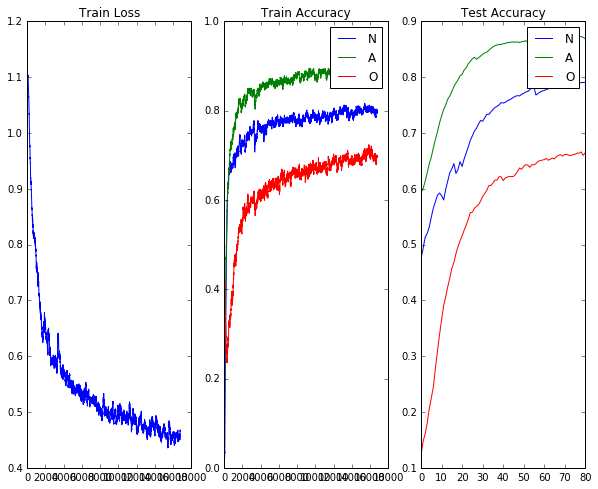

In [19]:
_ = trainer.plot(.01, .01, .1)

In [25]:
from scipy.io import loadmat

In [43]:
for f in loadmat('./data/marci_features/A00001.mat')['features'][0, -5:]:
    print (f.shape)

(1, 55)
(1, 33)
(1, 22)
(1, 22)
(1, 90)


In [24]:
[p.clone() for p in resnet8_32.parameters()]
#Variable.clone()

[Variable containing:
 (0 ,.,.) = 
   1.1704e-02 -4.1654e-02 -1.3536e-02  ...  -2.2484e-02 -2.7553e-02 -2.9429e-02
 
 (1 ,.,.) = 
   3.1314e-01  1.0371e-01  7.3563e-02  ...   2.2127e-02  1.3611e-01  1.2428e-01
 
 (2 ,.,.) = 
  -5.7946e-41  3.8220e-41 -5.3961e-41  ...   7.6640e-41  1.2770e-41  3.3771e-42
 ...
 
 (29,.,.) = 
  -2.3313e-02 -8.2931e-03  4.5887e-03  ...   2.4769e-03  4.1026e-02  3.0165e-02
 
 (30,.,.) = 
   1.0672e-02  7.5645e-02  2.1518e-02  ...   2.5191e-02  1.8335e-03  3.7230e-02
 
 (31,.,.) = 
  -5.8968e-02 -6.1178e-02  3.0667e-02  ...   5.8379e-02 -1.1740e-01  8.1035e-02
 [torch.cuda.FloatTensor of size 32x1x32 (GPU 0)], Variable containing:
  4.4081e-01
  2.8503e-01
  5.9946e-09
  1.9577e-01
  4.1578e-01
  2.4918e-01
  1.1495e+00
  6.2733e-01
  7.5124e-01
  4.5208e-01
  4.7406e-01
  3.4857e-01
  8.9330e-01
  4.1835e-01
  2.2552e-01
  2.4274e-01
 -1.5933e-01
  2.2952e-01
  6.5042e-01
  1.6151e-01
  6.1912e-02
 -1.4725e-02
  2.2626e-01
 -5.7591e-03
  7.5663e-02
  1.3878